# 🎯 模型泛化与偏差方差(Bias-variance tradeoff)

在机器学习中，我们追求的不是让模型在训练集上表现完美，而是让它能**正确地预测从未见过的数据**。这种能力被称为模型的 **泛化能力（generalization）**。而影响泛化能力的关键因素，就是我们在这一章要深入讨论的两个核心问题：

- **模型是否太简单？是否学得不够？（Underfitting）**
- **模型是否太复杂？是否只记住了训练集？（Overfitting）**

理解这两个现象的本质，我们必须先从一个更基础的概念出发，那就是——**泛化误差的来源**。机器学习中的预测误差不仅仅是“没学好”或“学太多”，它来源于三部分：

$$
\text{Expected Error} = \underbrace{\text{Bias}^2}_{模型假设能力不足} + \underbrace{\text{Variance}}_{模型对训练波动过度敏感} + \underbrace{\text{Noise}}_{数据本身的不可避免误差}
$$

- **Bias（偏差）**：模型对真实规律的刻画能力是否足够？
- **Variance（方差）**：模型是否对训练集变化太敏感，难以稳定泛化？
- **Noise（噪声）**：即使最优模型也无法避免的数据误差部分

只有当我们**在偏差和方差之间找到平衡点**，模型才能既有足够的表达力，又不会陷入过拟合。

# 📉 1. Bias-Variance Tradeoff（偏差-方差权衡）

---

## 📘 介绍

Bias-Variance Tradeoff（偏差-方差权衡）是理解机器学习中 **泛化误差来源** 的核心理论。

一个好的模型应该在训练集上拟合得足够好，同时又能泛化到新样本上。

如果模型太简单，会出现 **高偏差（Bias）**；

如果模型太复杂，则会出现 **高方差（Variance）**。

我们需要在这两者之间取得平衡，才能实现最小的测试误差。

---

## 📐 数学公式定义

泛化误差（期望预测误差）可以被拆分为三部分：

$$
\mathbb{E}[(\hat{y}(x) - y)^2] = \underbrace{(\mathbb{E}[\hat{y}(x)] - f(x))^2}_{\text{Bias}^2} + \underbrace{\mathbb{E}[(\hat{y}(x) - \mathbb{E}[\hat{y}(x)])^2]}_{\text{Variance}} + \underbrace{\sigma^2}_{\text{Irreducible Noise}}
$$

其中：

- $( f(x) $)：真实函数  
- $( \hat{y}(x) $)：模型的预测  
- $( \sigma^2 $)：数据本身的噪声项（无法消除）

---

## 🔍 几何 / 图像理解

你可以将 Bias-Variance Tradeoff 想象为一个“U 型误差曲线”：

| 模型复杂度 | 偏差 Bias | 方差 Variance | 总误差趋势       |
|------------|------------|----------------|-------------------|
| 很简单     | 高         | 低             | 欠拟合（Underfitting） |
| 合适       | 适中       | 适中           | 最优泛化         |
| 很复杂     | 低         | 高             | 过拟合（Overfitting） |

在图像上我们常看到：

- 横轴：模型复杂度（如多项式阶数）
- 纵轴：误差大小（Train Error、Test Error）
- 测试误差在中等复杂度时最低

---

## ⚙️ 特性总结

| 属性         | 说明                                                                 |
|--------------|----------------------------------------------------------------------|
| 📌 偏差       | 衡量模型对真实模式的刻画能力，偏差大说明模型太简单                  |
| 📌 方差       | 衡量模型对训练数据波动的敏感性，方差大说明模型过度依赖训练数据        |
| 📌 噪声       | 数据本身存在的无法建模的误差，如测量误差等                            |
| 📌 最优点     | 在 Bias 和 Variance 的交点找到测试误差最低的复杂度                      |
| 📌 可调策略   | 改变模型容量 / 增加数据 / 加正则 / 提前停止训练等                      |

---

## 💬 面试常见问题（含简答）

1. **什么是 Bias 和 Variance？**
   - Bias 是模型学习不到真实函数的能力缺陷；Variance 是模型对训练数据变化的敏感性。

2. **为什么 Bias-Variance 是一种权衡？**
   - 减少 Bias 一般意味着增加模型复杂度，而这往往会提高 Variance。

3. **如何找到最优模型复杂度？**
   - 通过交叉验证在测试误差最小的位置截断训练，或结合早停与正则化控制。

4. **是否总是模型越复杂越好？**
   - 否。复杂模型容易记住训练集但不泛化，反而导致更大测试误差。

5. **能否只通过训练误差判断模型优劣？**
   - 不可以，训练误差不能反映泛化能力，必须结合验证误差评估 Bias-Variance 状态。



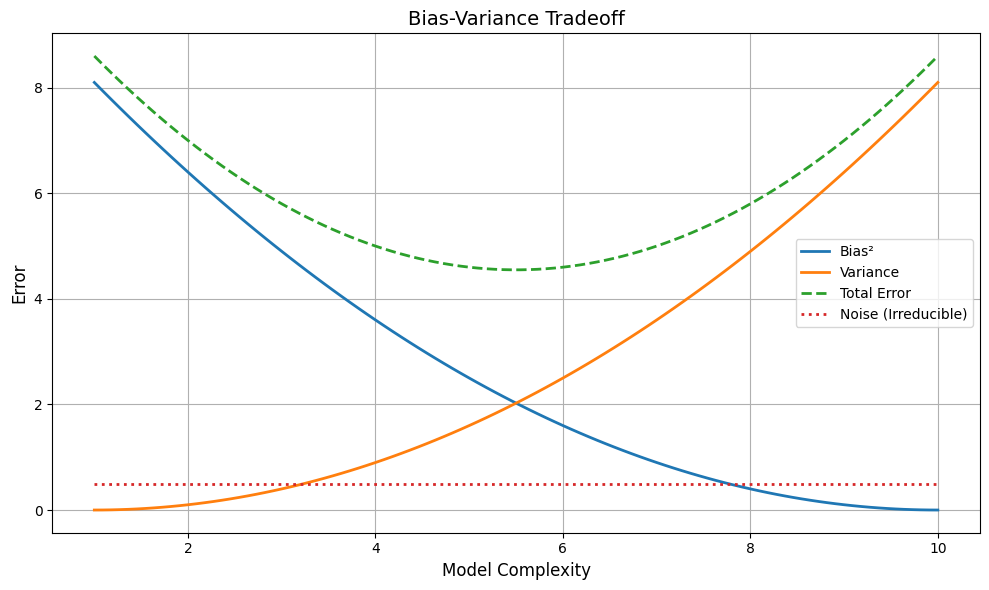

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 模拟模型复杂度（假设从1到10）
complexity = np.linspace(1, 10, 100)

# 构造 Bias² 和 Variance 的变化关系
bias2 = (10 - complexity) ** 2 / 10           # 随着复杂度增加，bias² 下降
variance = (complexity - 1) ** 2 / 10         # 随着复杂度增加，variance 上升
noise = np.ones_like(complexity) * 0.5        # 固定不可约噪声
total_error = bias2 + variance + noise        # 总误差：Bias² + Variance + Noise

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(complexity, bias2, label='Bias²', linewidth=2)
plt.plot(complexity, variance, label='Variance', linewidth=2)
plt.plot(complexity, total_error, label='Total Error', linestyle='--', linewidth=2)
plt.plot(complexity, noise, label='Noise (Irreducible)', linestyle=':', linewidth=2)

plt.xlabel("model Complexity", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.title("Bias-Variance Tradeoff", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔍 2. Overfitting & Underfitting（过拟合与欠拟合）

---

## 📘 介绍

在 Bias-Variance Tradeoff 的基础上，我们可以更具体地描述模型训练中常见的两种极端情况：

- **欠拟合（Underfitting）**：模型太简单，无法学习训练数据的规律 → 高偏差  
- **过拟合（Overfitting）**：模型太复杂，仅记住训练集，不具备泛化能力 → 高方差

理解这两种拟合状态，可以帮助我们更有效地调节模型复杂度与训练策略。

---

## 📐 定义 & 数学视角

| 类型         | 定义                                                         |
|--------------|--------------------------------------------------------------|
| Underfitting | 模型未能学到数据的模式，训练误差本身就很高                   |
| Overfitting  | 模型过于复杂，记住了训练集细节，验证集误差反而上升            |

对应训练误差 / 验证误差曲线如下所示：

---

## 📊 几何直觉与可视化（拟合示意）

- 欠拟合：模型画出的是一条“直线”，无法捕捉数据变化趋势  
- 正常拟合：模型大致跟随数据分布，有良好的泛化能力  
- 过拟合：模型绕着每个点拐弯，训练误差很低但泛化极差

---

## 💬 面试常见问题（含简答）

1. **怎么判断你的模型过拟合了？**
   - 训练误差很低，验证误差持续上升，说明模型记住了训练数据但无法泛化。

2. **欠拟合怎么解决？**
   - 增加模型复杂度，提供更多特征，延长训练时间，减少正则。

3. **过拟合怎么办？**
   - 加入正则项（L1/L2）、使用 Dropout、Early Stopping 或收集更多数据。

4. **过拟合一定是坏事吗？**
   - 通常是坏事，但在某些小样本场景中过拟合可能也带来较好的训练表现（需谨慎权衡）。

5. **为什么训练误差很低但验证误差很高？**
   - 典型过拟合特征，模型学会了训练数据中的噪声或偶然模式。


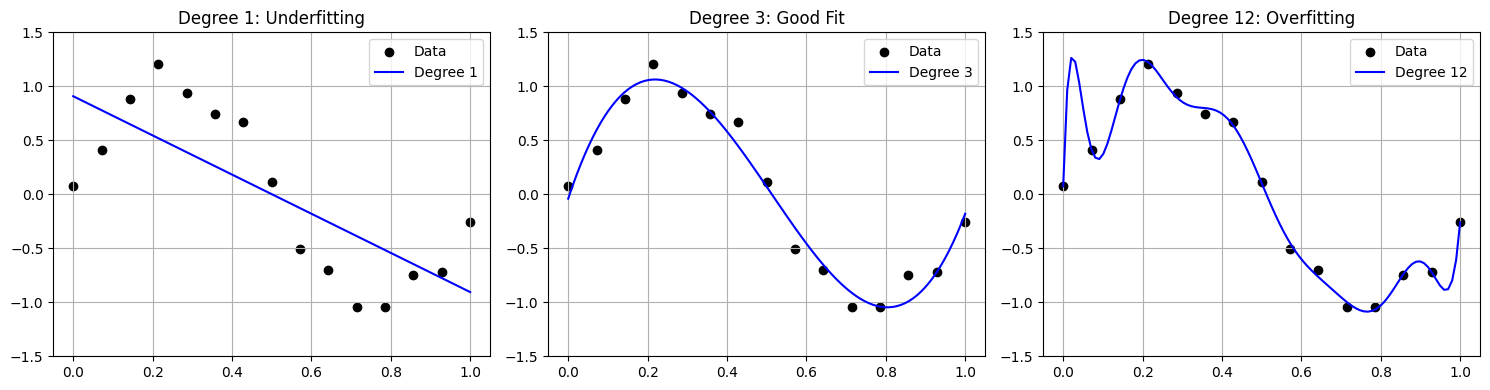

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 生成数据（加点噪声）
np.random.seed(42)
X = np.linspace(0, 1, 15)
y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.15, X.shape)

X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
X = X.reshape(-1, 1)

# 多项式回归模型：欠拟合（1阶）、合适拟合（3阶）、过拟合（12阶）
degrees = [1, 3, 12]
models = [make_pipeline(PolynomialFeatures(deg), LinearRegression()) for deg in degrees]

# 拟合并绘图
plt.figure(figsize=(15, 4))
for i, (model, deg) in enumerate(zip(models, degrees)):
    plt.subplot(1, 3, i + 1)
    model.fit(X, y)
    y_pred = model.predict(X_plot)
    plt.scatter(X, y, color='black', label='Data')
    plt.plot(X_plot, y_pred, label=f'Degree {deg}', color='blue')
    plt.title(f'Degree {deg}: {"Underfitting" if deg==1 else "Overfitting" if deg==12 else "Good Fit"}')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


## 🔬 Overfitting 深入理解

---

### 🎯 本质解构

过拟合 ≠ 模型太强  
✅ 本质：模型**把训练集的噪声和偶然性也学进去了**，导致泛化误差上升。

换句话说：
> 训练误差 = 模型能力 + 对训练集噪声的“过度记忆”

---

### 🧭 如何识别过拟合？（不仅靠误差）

| 观察维度       | 是否异常                         | 说明                                                  |
|----------------|----------------------------------|--------------------------------------------------------|
| 训练误差       | 低                               | 模型“学会”训练集                                       |
| 验证误差       | 高                               | 泛化能力差，是主要警告信号                             |
| 学习曲线       | 验证误差在下降后反弹             | 出现“U型结构”拐点，拐点后即为过拟合区域                 |
| 预测波动       | 对测试集或新数据表现极不稳定     | 小扰动就导致预测剧变，模型敏感性过强                   |

---

### 🧪 例子：人脸识别 & 医疗模型

- 训练集中某张图刚好模糊 + 背景复杂，模型学到了这“种噪声”
- 医疗数据中某些指标只是“巧合性强相关”，模型却将其当成决定性特征

这些信息对训练集有效，但**在新数据中毫无用处甚至误导预测**

---

### 🛠️ 几种经典缓解手段

| 方法                  | 原理                                                   |
|-----------------------|--------------------------------------------------------|
| L1 / L2 正则化        | 限制模型参数大小，防止过于复杂                         |
| Dropout（随机丢弃）   | 让网络不要过度依赖任何一个神经元，提高鲁棒性           |
| Early Stopping        | 训练到验证误差最低处就停止，防止“反弹”阶段              |
| 数据增强（图像/文本） | 增加样本多样性，让模型“学不到细节”                     |
| 模型集成（Bagging等） | 融合多个弱模型预测，降低单个模型过拟合的风险           |


## 📋 常见模型中的 Overfitting 缓解策略对照表

| 模型类型            | 常见过拟合现象                           | 解决办法                                                   |
|---------------------|-------------------------------------------|------------------------------------------------------------|
| 线性回归 / 逻辑回归 | 拟合训练集但泛化能力差，参数绝对值过大     | 加入 L1（Lasso）或 L2（Ridge）正则；降维或特征选择            |
| 决策树（CART）       | 训练集准确率高，测试集准确率波动大         | 限制树深度、剪枝（Post-pruning）、设置 min_samples_leaf     |
| 随机森林 / Bagging  | 训练集接近完美预测                       | 降低树的复杂度（如 max_depth）、增加样本、调节 max_features |
| Boosting 系列        | 验证误差反弹严重                         | 提前停止（Early Stopping）、降低学习率、设置 min_child_weight |
| 神经网络（MLP/CNN） | 训练 loss 极低，val loss 上升或震荡       | Dropout、L2 正则、EarlyStopping、BatchNorm、数据增强       |
| Transformer / BERT  | 小样本 fine-tune 验证集效果不稳           | 冻结部分层参数、Gradual Unfreeze、减少 epoch、加 Dropout    |
| KNN / 非参数方法     | 训练集误差几乎为 0                       | 降低 k 值、使用加权距离、标准化特征、防止噪声主导           |



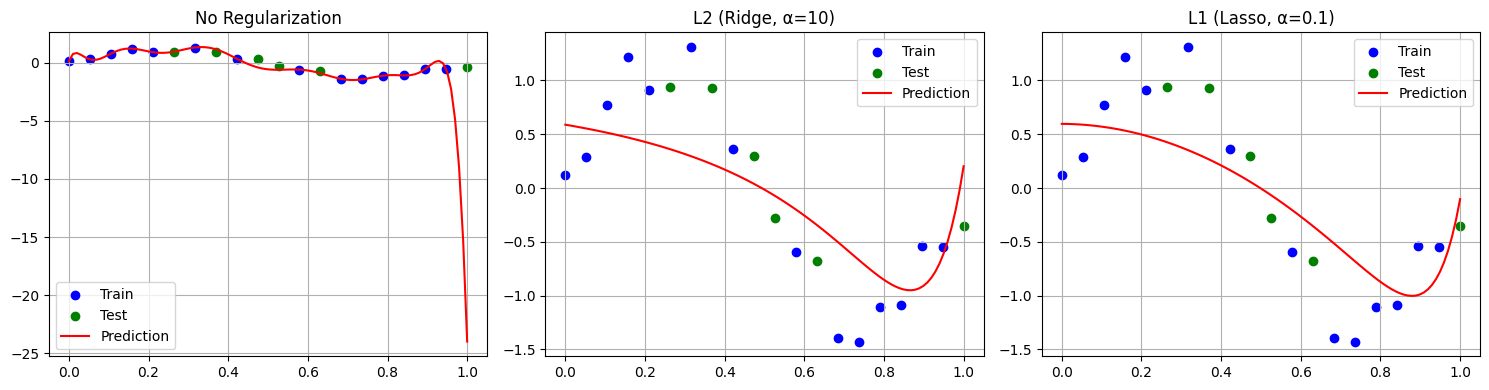

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

#使用L1, L2 Regularization

# 生成非线性数据（带噪）
np.random.seed(42)
X = np.linspace(0, 1, 20).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.25, X.shape[0])

# 拆分训练和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 模型集合
models = {
    "No Regularization": LinearRegression(),
    "L2 (Ridge, α=10)": Ridge(alpha=10),
    "L1 (Lasso, α=0.1)": Lasso(alpha=0.1, max_iter=10000)
}

plt.figure(figsize=(15, 4))

# 多项式拟合（高阶）用于诱导过拟合
degree = 15

for i, (name, model) in enumerate(models.items()):
    pipeline = make_pipeline(PolynomialFeatures(degree), StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # 画图
    plt.subplot(1, 3, i + 1)
    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
    y_plot = pipeline.predict(X_plot)
    plt.scatter(X_train, y_train, label="Train", color='blue')
    plt.scatter(X_test, y_test, label="Test", color='green')
    plt.plot(X_plot, y_plot, label="Prediction", color='red')
    plt.title(name)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## 🧊 Underfitting 深入理解

---

### 🧠 本质理解

欠拟合的关键在于：**模型表达能力不够，甚至训练数据都拟合不好**。  
相比之下，过拟合是模型能力太强，把噪声也“学”进去了。

一句话总结：
> 欠拟合错在“看不懂”，过拟合错在“记太多”。

---

### 🛠️ 欠拟合的典型原因

| 类别         | 原因示例                              |
|--------------|----------------------------------------|
| 模型过于简单 | 用线性模型拟合非线性分布 / 神经网络层数过少     |
| 特征不完整   | 未引入交互项 / 缺乏多项式扩展或 embedding       |
| 正则过强     | L1/L2 正则项系数过大导致模型系数被压为 0        |
| 训练不充分   | 学习率太低、迭代次数太少、提前终止训练            |

---

### 🧪 实际中如何判断？

- 若训练误差很高，模型始终无法“靠近”目标值
- 学习曲线中训练/验证误差都高且持平
- 模型输出总是趋向平均、忽略变化 → 无法捕捉规律

---

### 🛠️ 缓解策略

| 方法                  | 效果                                         |
|-----------------------|----------------------------------------------|
| 增加模型复杂度        | 换用非线性模型 / 加深网络层数 / 加大宽度        |
| 加特征工程            | 添加交叉特征、多项式扩展、文本/图像 embedding |
| 减弱正则化强度        | 降低 L1/L2 系数，释放参数表达能力                |
| 提高训练强度          | 增大 epoch / 调高学习率 / 使用更强优化器         |




## ⚙️ 特性对比表

| 拟合状态       | 训练误差 | 验证误差 | 表现特征                               | 常见原因                         |
|----------------|-----------|------------|----------------------------------------|----------------------------------|
| 欠拟合         | 高        | 高         | 学不动，模型太弱                      | 模型简单、特征不足、欠训练       |
| 合理拟合       | 低        | 低         | 能泛化，有效预测                      | 模型适中、数据充分、调参合理     |
| 过拟合         | 低        | 高         | “记住”训练集，泛化失败               | 模型太复杂、数据少、训练太久     |
